In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

import matplotlib.pyplot as plt
%matplotlib inline

# Allow us to load modules from the parent directory
import sys
sys.path.append(r'C:\Users\dell\ML\ml-networking\lib') 
from parse_pcap import pcap_to_pandas, send_rates

In [2]:
pcap = pcap_to_pandas(r'C:\Users\dell\ML\HW3lab.pcap')

# Pandas Dataframe with only DNS packets
dns_packets = pcap.loc[pcap['is_dns'] == True];
dns_packets.head(n=5)

,datetime,dns_query,dns_resp,ip_dst,ip_dst_int,ip_src,ip_src_int,is_dns,length,mac_dst,mac_dst_int,mac_src,mac_src_int,port_dst,port_src,protocol,time,time_normed
22,2021-03-02 21:38:36,b'nf5.boom.party.',None,202.102.213.68,3.395737e+09,192.168.0.105,3.232236e+09,True,74,60:3a:7c:33:3f:82,105804308103042,9c:b6:d0:e7:04:23,172309002781731,53.0,53851.0,UDP,1614692316.674349,5.788145
23,2021-03-02 21:38:36,b'nf5.boom.party.',b'nf5.boom.party.',192.168.0.105,3.232236e+09,202.102.213.68,3.395737e+09,True,434,9c:b6:d0:e7:04:23,172309002781731,60:3a:7c:33:3f:82,105804308103042,53851.0,53.0,UDP,1614692316.682718,5.796514
185,2021-03-02 21:38:56,b'cjhd.mediav.com.',None,202.102.213.68,3.395737e+09,192.168.0.105,3.232236e+09,True,75,60:3a:7c:33:3f:82,105804308103042,9c:b6:d0:e7:04:23,172309002781731,53.0,61287.0,UDP,1614692336.203841,25.317637
186,2021-03-02 21:38:56,b'cjhd.mediav.com.',b'cjhd.mediav.com.',192.168.0.105,3.232236e+09,202.102.213.68,3.395737e+09,True,370,9c:b6:d0:e7:04:23,172309002781731,60:3a:7c:33:3f:82,105804308103042,61287.0,53.0,UDP,1614692336.211607,25.325403
196,2021-03-02 21:38:56,b'static-ssl.mediav.com.',None,202.102.213.68,3.395737e+09,192.168.0.105,3.232236e+09,True,81,60:3a:7c:33:3f:82,105804308103042,9c:b6:d0:e7:04:23,172309002781731,53.0,64949.0,UDP,1614692336.246590,25.360386


In [3]:
dns_ft = dns_packets.loc[:,['length','dns_resp']]
dns_ft.head(10)

,length,dns_resp
22,74,None
23,434,b'nf5.boom.party.'
185,75,None
186,370,b'cjhd.mediav.com.'
196,81,None
198,76,None
199,318,b'static-ssl.mediav.com.'
201,308,b's0.ssl.qhres.com.'
235,74,None
236,434,b'n77.boom.party.'


In [4]:
dns_ft.shape

(129, 2)

In [5]:
dns_ft['response'] = dns_ft['dns_resp'].astype(bool)
dns_ft['response'] = dns_ft['response'].astype(int)
dns_ft.head(10)

,length,dns_resp,response
22,74,None,0
23,434,b'nf5.boom.party.',1
185,75,None,0
186,370,b'cjhd.mediav.com.',1
196,81,None,0
198,76,None,0
199,318,b'static-ssl.mediav.com.',1
201,308,b's0.ssl.qhres.com.',1
235,74,None,0
236,434,b'n77.boom.party.',1


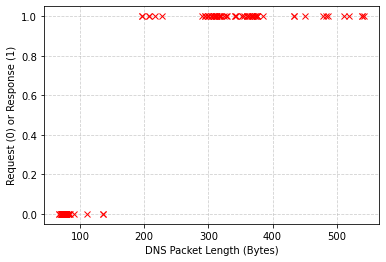

In [6]:
x = dns_ft['length'].values
y = dns_ft['response'].values

plt.plot(x,y, 'x', color='red')
plt.ylabel("Request (0) or Response (1)")
plt.xlabel("DNS Packet Length (Bytes)")
plt.grid(linestyle='--', alpha=0.6)
plt.show()

In [7]:
regr = LogisticRegression(solver='lbfgs', C=1)
regr.fit(x.reshape(-1,1),y)

LogisticRegression(C=1)

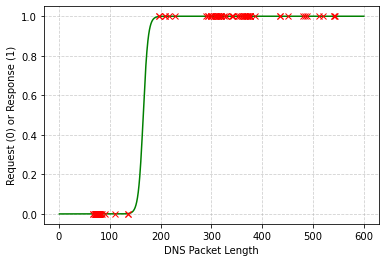

In [ ]:
# Plot data
# z is a simple number line 1 to 600
z = np.arange(1, 600, 0.5).reshape(-1, 1);

# prediction: plot the number line against the predictions for those values
plt.plot(z, regr.predict_proba(z)[:, 1], color='green');
plt.plot(x,y, 'x', color='red')
plt.ylabel("Request (0) or Response (1)")
plt.xlabel("DNS Packet Length")
plt.grid(linestyle='--', alpha=0.6)
plt.show()